**CODERS CAVE**

**NORMAL TASK - Email Spam Detection**

**Soumalya Bhattacharyya - Data Science Intern**

## Importing the necessary libraries

In [305]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

### Training the Toronto dataset for speech emotion recognition

#### Creating a dataframe for Toronto dataset

In [306]:
paths=[]
labels=[]
for dirname, _,filenames in os.walk('./iinput/TESS Toronto emotional speech set data/'):
    # print('dirname: '+dirname+' filenames: '+str(filenames))
    # print('2nd loop\n')
    for fname in filenames:
        paths.append(os.path.join(dirname,fname))
        # print(paths)
        label=(fname.split('_')[-1]).split('.')[0]
        # print(label)
        labels.append(label)

print(paths[:10])
print(labels[:10])

['./iinput/TESS Toronto emotional speech set data/OAF_angry\\OAF_back_angry.wav', './iinput/TESS Toronto emotional speech set data/OAF_angry\\OAF_bar_angry.wav', './iinput/TESS Toronto emotional speech set data/OAF_angry\\OAF_base_angry.wav', './iinput/TESS Toronto emotional speech set data/OAF_angry\\OAF_bath_angry.wav', './iinput/TESS Toronto emotional speech set data/OAF_angry\\OAF_bean_angry.wav', './iinput/TESS Toronto emotional speech set data/OAF_angry\\OAF_beg_angry.wav', './iinput/TESS Toronto emotional speech set data/OAF_angry\\OAF_bite_angry.wav', './iinput/TESS Toronto emotional speech set data/OAF_angry\\OAF_boat_angry.wav', './iinput/TESS Toronto emotional speech set data/OAF_angry\\OAF_bone_angry.wav', './iinput/TESS Toronto emotional speech set data/OAF_angry\\OAF_book_angry.wav']
['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry']


In [307]:
df=pd.DataFrame({'speech': paths,
                 'labels':labels})
df.head()

,speech,labels
0,./iinput/TESS Toronto emotional speech set dat...,angry
1,./iinput/TESS Toronto emotional speech set dat...,angry
2,./iinput/TESS Toronto emotional speech set dat...,angry
3,./iinput/TESS Toronto emotional speech set dat...,angry
4,./iinput/TESS Toronto emotional speech set dat...,angry


In [308]:
df['labels'].value_counts()

angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: labels, dtype: int64

### exploratory data analysis

<AxesSubplot: xlabel='labels', ylabel='count'>

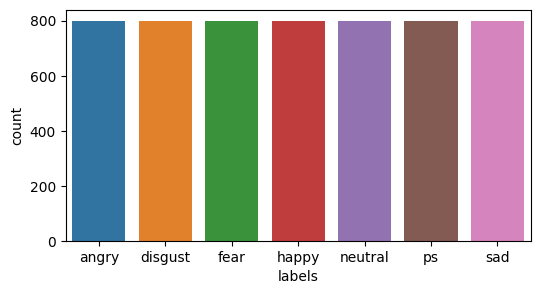

In [309]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='labels')

In [310]:
class_names=np.array(['angry','disgust','fear','happy','neutral','ps','sad'])

#### Waveplots and spectograms for audios in the toronto dataset

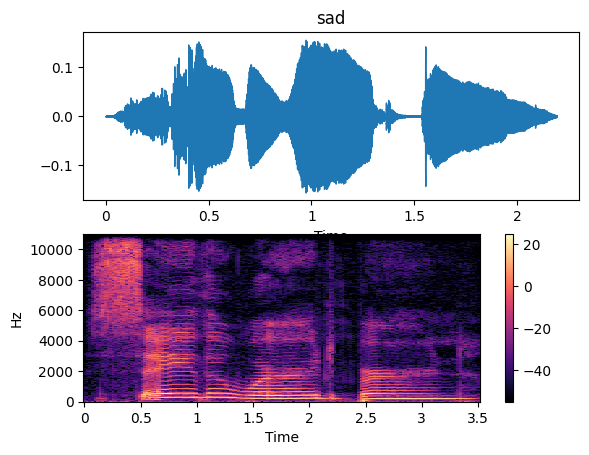

In [311]:
emotion1='sad'
emotion2='happy'
emotion3='fear'
n_ftt=1024
hop_length=320
win_type='hann'


audio1=df['speech'][df['labels']==emotion1].iloc[411]
audio2=df['speech'][df['labels']==emotion2].iloc[411]
audio3=df['speech'][df['labels']==emotion3].iloc[411]

# [df['labels']==emotion]

# plt.figure(figsize=(20,18))

x,sampling_rate=librosa.load(audio1)
plt.subplot(2,1,1)
plt.title(emotion1)
librosa.display.waveshow(x,sr=sampling_rate)

x=librosa.stft(x,n_fft=n_ftt,hop_length=hop_length,win_length=n_ftt,window=win_type)
xdb=librosa.amplitude_to_db(x)
plt.subplot(2,1,2)
librosa.display.specshow(xdb,sr=sampling_rate,x_axis='time',y_axis='hz')
plt.colorbar()

Audio(audio1)

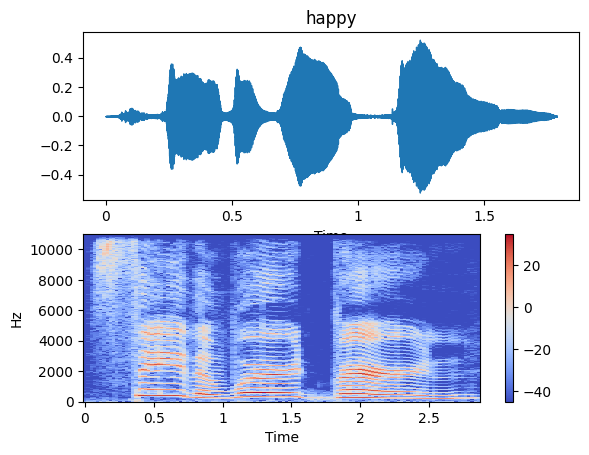

In [312]:
y,sr=librosa.load(audio2)
plt.subplot(2,1,1)
plt.title(emotion2)
librosa.display.waveshow(y,sr=sr)

y=librosa.stft(y,n_fft=n_ftt,hop_length=hop_length,win_length=n_ftt,window=win_type)
ydb=librosa.amplitude_to_db(y)
plt.subplot(2,1,2)
librosa.display.specshow(ydb,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

Audio(audio2)


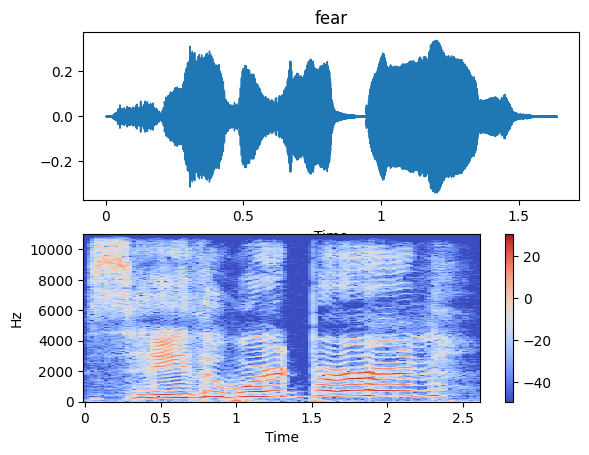

In [313]:
z,sr1=librosa.load(audio3)
plt.subplot(2,1,1)
plt.title(emotion3)
librosa.display.waveshow(z,sr=sr1)

z=librosa.stft(z,n_fft=n_ftt,hop_length=hop_length,win_length=n_ftt,window=win_type)
zdb=librosa.amplitude_to_db(z)
plt.subplot(2,1,2)
librosa.display.specshow(zdb,sr=sr1,x_axis='time',y_axis='hz')
plt.colorbar()

Audio(audio3)

In [314]:
emotion4='angry'
emotion5='disgust'
emotion6='ps'
emotion7='neutral'

audio4=df['speech'][df['labels']==emotion4].iloc[411]
audio5=df['speech'][df['labels']==emotion5].iloc[411]
audio6=df['speech'][df['labels']==emotion6].iloc[411]
audio7=df['speech'][df['labels']==emotion7].iloc[411]

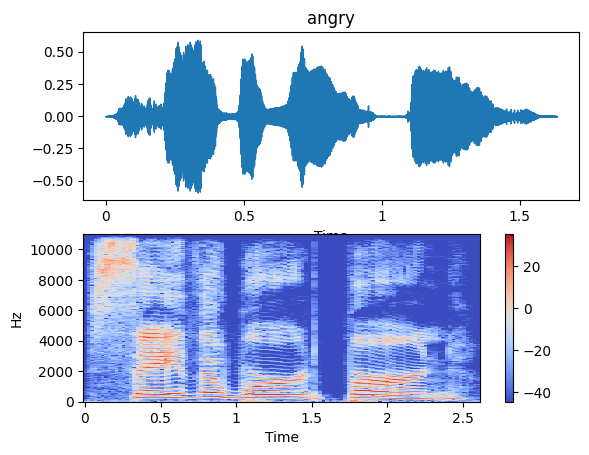

In [315]:

z1,sr2=librosa.load(audio4)
plt.subplot(2,1,1)
plt.title(emotion4)
librosa.display.waveshow(z1,sr=sr2)

z1=librosa.stft(z1,n_fft=n_ftt,hop_length=hop_length,win_length=n_ftt,window=win_type)
zdb1=librosa.amplitude_to_db(z1)
plt.subplot(2,1,2)
librosa.display.specshow(zdb1,sr=sr2,x_axis='time',y_axis='hz')
plt.colorbar()

Audio(audio4)

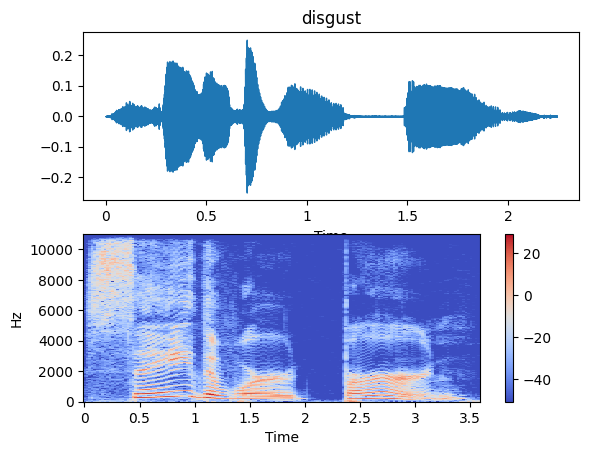

In [316]:
z2,srate3=librosa.load(audio5)
plt.subplot(2,1,1)
plt.title(emotion5)
librosa.display.waveshow(z2,sr=srate3)

z2=librosa.stft(z2,n_fft=n_ftt,hop_length=hop_length,win_length=n_ftt,window=win_type)
zdb2=librosa.amplitude_to_db(z2)
plt.subplot(2,1,2)
librosa.display.specshow(zdb2,sr=srate3,x_axis='time',y_axis='hz')
plt.colorbar()

Audio(audio5)

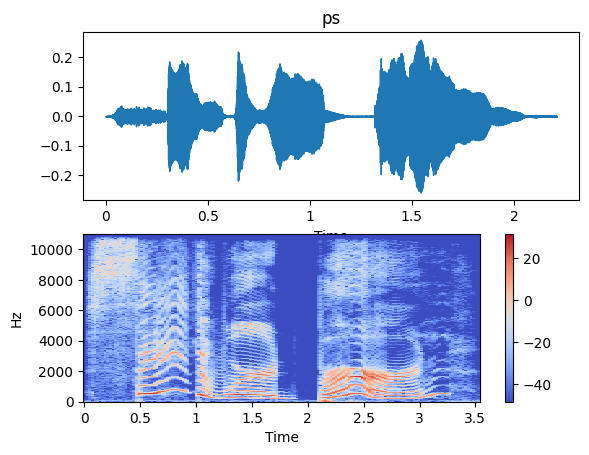

In [317]:
z4,srate4=librosa.load(audio6)
plt.subplot(2,1,1)
plt.title(emotion6)
librosa.display.waveshow(z4,sr=srate4)

z4=librosa.stft(z4,n_fft=n_ftt,hop_length=hop_length,win_length=n_ftt,window=win_type)
zdb4=librosa.amplitude_to_db(z4)
plt.subplot(2,1,2)
librosa.display.specshow(zdb4,sr=srate4,x_axis='time',y_axis='hz')
plt.colorbar()

Audio(audio6)

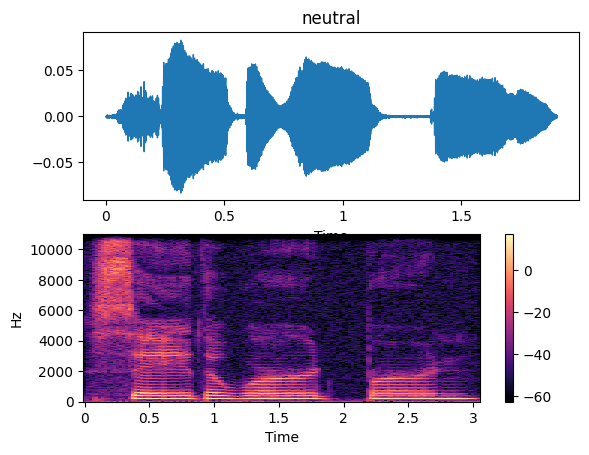

In [318]:
z5,srate5=librosa.load(audio7)
plt.subplot(2,1,1)
plt.title(emotion7)
librosa.display.waveshow(z5,sr=srate5)

z5=librosa.stft(z5,n_fft=n_ftt,hop_length=hop_length,win_length=n_ftt,window=win_type)
zdb5=librosa.amplitude_to_db(z5)
plt.subplot(2,1,2)
librosa.display.specshow(zdb5,sr=srate5,x_axis='time',y_axis='hz')
plt.colorbar()

Audio(audio7)

In [319]:
def extract_features(fname):
    x,sr=librosa.load(fname,duration=3,offset=0.5)
    mfcc=librosa.feature.mfcc(y=x,sr=sr,n_mfcc=40)

    # print(mfcc.shape)
    # print(mfcc.T.shape)

    # row-wise mean
    # print(np.mean(mfcc,axis=1))
    # print(np.mean(mfcc.T,axis=0))
    return np.mean(mfcc,axis=1)

In [320]:
extract_features(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [321]:
arr=[[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
print(np.mean(arr,axis=0))

[5.5 6.5 7.5]


In [322]:
X_mfcc=df['speech'].apply(lambda x:extract_features(x))

In [323]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560087, -32.74544, -...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865499, 16.092943, 8....
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54757, 24.800041, 43.04809, 4...
5597    [-378.50494, 80.91062, 35.30053, 39.74792, -4....
5598    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [324]:
X_arr=[x for x in X_mfcc]
X_arr=np.array(X_arr)


In [325]:
x=np.expand_dims(X_arr,-1)
print(X_arr.shape)
x.shape

(5600, 40)


(5600, 40, 1)

In [326]:
x

array([[[-396.9862   ],
        [  77.44054  ],
        [ -19.59279  ],
        ...,
        [   9.313923 ],
        [   2.0891502],
        [  -1.9064913]],

       [[-465.73267  ],
        [  98.77373  ],
        [   0.6560087],
        ...,
        [   8.680707 ],
        [   4.173659 ],
        [   3.258969 ]],

       [[-429.79196  ],
        [  46.124    ],
        [   1.5550478],
        ...,
        [   8.633682 ],
        [  -2.4228284],
        [  -2.3461313]],

       ...,

       [[-378.50494  ],
        [  80.91062  ],
        [  35.30053  ],
        ...,
        [   6.463878 ],
        [   4.545148 ],
        [   7.043935 ]],

       [[-434.8618   ],
        [  89.906364 ],
        [  28.373262 ],
        ...,
        [  10.526768 ],
        [  11.808918 ],
        [  10.119672 ]],

       [[-421.8341   ],
        [  70.69788  ],
        [  32.476387 ],
        ...,
        [   5.080212 ],
        [   5.1315765],
        [   6.3598347]]], dtype=float32)

In [327]:
# from keras.utils import to_categorical
# y=to_categorical(df['labels'].astype('str'))

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
y=enc.fit_transform(df['labels'])
y

array([0, 0, 0, ..., 6, 6, 6])

### LSTM MODEL

In [328]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

model=Sequential([
    LSTM(300,input_shape=(40,1)),
    Dense(100,activation='relu'),
    Dropout(0.2),
    Dense(50,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 300)               362400    
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                 357       
                                                                 
Total params: 397,907
Trainable params: 397,907
Non-tr

#### splitting into training and testing dataset

In [329]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=25)

#### fitting the model

In [330]:
result=model.fit(xtrain,ytrain,validation_split=0.2,epochs=65,batch_size=512,shuffle=True)

Epoch 1/65
7/7 [==============================] - 8s 694ms/step - loss: 1.7413 - accuracy: 0.3348 - val_loss: 1.3545 - val_accuracy: 0.5421
Epoch 2/65
7/7 [==============================] - 4s 528ms/step - loss: 1.2125 - accuracy: 0.5265 - val_loss: 0.8918 - val_accuracy: 0.6582
Epoch 3/65
7/7 [==============================] - 4s 512ms/step - loss: 0.9470 - accuracy: 0.6065 - val_loss: 0.6462 - val_accuracy: 0.8112
Epoch 4/65
7/7 [==============================] - 4s 529ms/step - loss: 0.7250 - accuracy: 0.7293 - val_loss: 0.4653 - val_accuracy: 0.8508
Epoch 5/65
7/7 [==============================] - 4s 545ms/step - loss: 0.5106 - accuracy: 0.8192 - val_loss: 0.2390 - val_accuracy: 0.9222
Epoch 6/65
7/7 [==============================] - 4s 517ms/step - loss: 0.3791 - accuracy: 0.8763 - val_loss: 0.1722 - val_accuracy: 0.9515
Epoch 7/65
7/7 [==============================] - 4s 536ms/step - loss: 0.2450 - accuracy: 0.9247 - val_loss: 0.1637 - val_accuracy: 0.9503
Epoch 8/65
7/7 [====

#### visualizing accuracy and loss

In [331]:
acc=result.history['accuracy']
val_acc=result.history['val_accuracy']
loss=result.history['loss']
val_loss=result.history['val_loss']


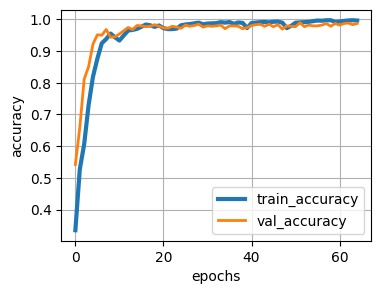

In [332]:
epochs=list(range(65))
plt.figure(figsize=(4,3))
plt.plot(epochs,acc,lw=3,label='train_accuracy')
plt.plot(epochs,val_acc,lw=2,label='val_accuracy')
plt.grid(b=True)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

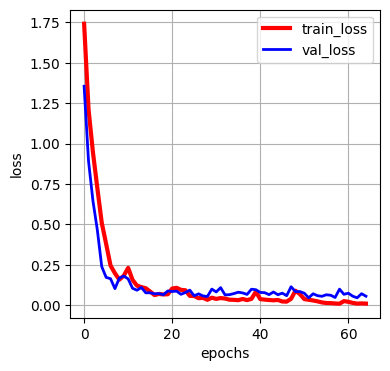

In [333]:
plt.figure(figsize=(4,4))
plt.plot(epochs,loss,c='red',label='train_loss',lw=3)
plt.plot(epochs,val_loss,c='blue',label='val_loss',lw=2)
plt.grid(b=True)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### predicting values for test data

In [334]:
import tensorflow as tf

In [335]:
pred_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [336]:
ypred=pred_model.predict(xtest)

53/53 [==============================] - 3s 41ms/step


In [337]:
ypred[120]

array([0.11470232, 0.11470191, 0.11470179, 0.3117889 , 0.1147017 ,
       0.11470171, 0.1147017 ], dtype=float32)

In [338]:
ypred.shape

(1680, 7)

In [339]:
def plot_img(i,preds,true_label):
    t_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(7))
    thisplot = plt.bar(range(7), preds, color="#777777")
    predicted_label = np.argmax(preds)
    print(predicted_label)

    if(predicted_label==t_label): thisplot[predicted_label].set_color('green')
    else: thisplot[predicted_label].set_color('red')

    
    thisplot[t_label].set_color('green')

6


([<matplotlib.axis.XTick at 0x1ec108cda10>,
 [Text(0, 0, 'angry'),
  Text(1, 0, 'disgust'),
  Text(2, 0, 'fear'),
  Text(3, 0, 'happy'),
  Text(4, 0, 'neutral'),
  Text(5, 0, 'ps'),
  Text(6, 0, 'sad')])

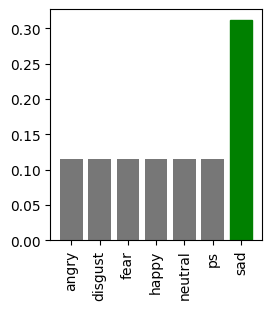

In [340]:
img_id=4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img(img_id, ypred[img_id], ytest)
plt.xticks(range(7), class_names, rotation=90)